# Это полный бред? 

Пусть у нас есть страховая фирма. К нам приходят страховаться $25$-летние девушки. Они покупают страховку длительностью на год. Вероятность того, что девушка в течение года пораниться равна $0.001$. Сколько девушек нам нужно застраховать, чтобы прибыль фирмы оказалась положительной с вероятностью $0.99?$ Пусть $L$ - стоимость страховки, а $M$ - выплата в случае наступления страхового случая. 

Прикинем исходя из ЦПТ сколько нам понадобится людей для положительной прибыли. Мы помним, что если $X_i$ — прибыль с одной страховки и $L$ - её цена, а $M$ - выплаты, тогда

  $X_i$     | $L$  | $L - M$
 ---------- | ------ | -------------
$P(\ldots)$ | $p$  | $1 - p$

Средняя прибыль компании составит $\frac{1}{n} \sum X_i$. По закону больших чисел:

$$
\frac{1}{n} \sum_{i=1}^n X_i \overset{p}{\to} E(X_i) 
$$

У нас число $n$ может быть конечным, поэтому нас интересует число $n$ такое, что 

$$
P \left( \frac{1}{n} \sum X_i > 0 \right) > 0.99 
$$

Найдём математическое ожидание и дисперсию случайной величины $X_i$: 

\begin{equation}
\begin{aligned} 
E(X_i) = L - (1 - p) \cdot M \\
Var(X_i) = M^2 \cdot p \cdot (1-p)
\end{aligned} 
\end{equation}

По ЦПТ 

$$
\bar x \sim N \left( E(X_i), \frac{Var(X_i)}{n} \right),
$$

Знание этого факта позволяет нам найти в явном виде формулу для $n$. Давайте сделаем это. Мы хотим, чтобы 

$$
P(\bar x > 0) > 0.99.
$$

Найдём вероятность того, что среднее больше нуля. 

$$
P \left( \bar x > 0 \right) = P \left( \frac{\bar x - E(X_i)}{\sqrt{\frac{Var(X_i)}{n}}} > \frac{- E(X_i)}{\sqrt{\frac{Var(X_i)}{n}}} \right) = 1 - \Phi \left(\frac{- E(X_i)}{\sqrt{\frac{Var(X_i)}{n}}} \right) =  \Phi \left(\frac{E(X_i)}{\sqrt{\frac{Var(X_i)}{n}}} \right) > 0.99
$$

Получается, что 

$$
\frac{E(X_i)}{\sqrt{\frac{Var(X_i)}{n}}} > u_{0.99}.
$$

Отсюда находим, что требуемое число клиентов должно быть таким: 

$$
n > \left(\frac{u_{0.99}}{E(X_i)}\right)^2 \cdot Var(X_i)
$$

In [15]:
options(repr.plot.width=4, repr.plot.height=3)

In [17]:
L = 10000       # цена страховки
M = 10^6       # выплата, при наступлении страхового случая 
p_wom = 0.999  # вероятность, что всё будет хорошо 

mu = L - (1 - p_wom)*M
cat('теоретический средний доход:', mu,'\n')

s2 = M^2*p_wom*(1 - p_wom)
cat('теоретическая дисперсия:', s2, '\n')

n = s2*(qnorm(0.99)/mu)**2
cat('Число клиентов:', n,'\n')

теоретический средний доход: 9000 
теоретическая дисперсия: 9.99e+08 
Число клиентов: 66.7467 


во всей этой ситуации вполне осмысленен вопрос: а какого чёрта, мы решили взять и апроксимировать поведение среднего нормальным распределением? Если мы попробуем сделать большое количество генераций и посмотреть что происхиодит с распределением, мы увидим, что при больших $n$ никакой сходимости к нормальному распределению не наблюдается. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


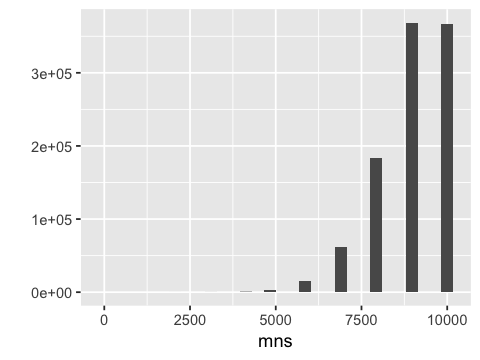

In [18]:
library('ggplot2')

L = 10000  # цена страховки
M = 10^6   # выплата, при наступлении страхового случая 

mns = rep(0,10^6)
for(i in 1:10^6){
    mns[i] = mean(sample(c(L, L - M), size=1000, prob = c(p_wom, 1 - p_wom),replace=T))
}

qplot(mns)

При этом, если бы вероятность пораниться была повыше, мы бы могли увидеть привычный нам купол. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


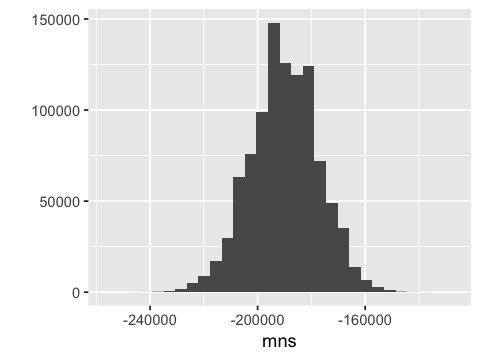

In [19]:
L = 10000  # цена страховки
M = 10^6   # выплата, при наступлении страхового случая 

mns = rep(0,10^6)
for(i in 1:10^6){
    mns[i] = mean(sample(c(L, L - M), size=1000, prob = c(0.8, 1 - 0.8),replace=T))
}

qplot(mns)

Если вы задумаетесь о том, почему это так происходит, вы вспомните, что кода $p$ или $(1-p)$ близко к нулю, ЦПТ перестаёт работать. Для таких редких событий лучше себя зарекомендовало распределение Пуассона. Давайте посмотрим, что нам про оптимальную численность скажет оно. Переведём $X_i$ в Бернулиевскую случайную величину. 

  $X_i$     | $L$  | $L - M$
 ---------- | ------ | -------------
$P(\ldots)$ | $p$  | $1 - p$


Если $Y_i = \frac{X_i - L}{M} \cdot (-1)$, тогда 

  $Y_i$     | $0$  | $1$
 ---------- | ------ | -------------
$P(\ldots)$ | $p$  | $1 - p$

Вероятность $1-p$ - это вероятность успеха. Она очень близка к нулю. В прибилжении Пуассона именно это и требуется. Начинаем искать вероятность. 

$$
P(\bar X \ge 0) = P \left(\sum X_i \ge 0\right) = P\left(\sum(L - M \cdot Y_i  \ge 0\right) = P\left(nL - M \sum Y_i \ge 0\right) = P\left(\sum Y_i \le n \cdot \frac{L}{M}\right).
$$

Кажется, что формула готова. 

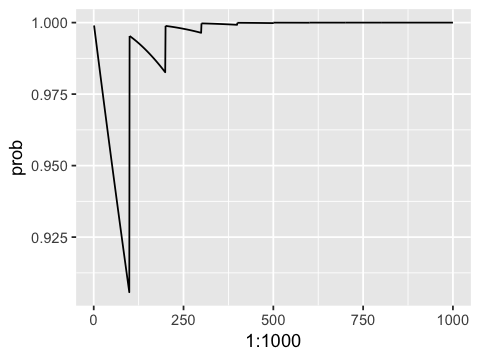

In [42]:
L = 10^4 # цена страховки
M = 10^6   # выплата, при наступлении страхового случая 

prob = rep(0, 1000)
for(n in 1:1000){
    prob[n] = ppois(n*L/M, lambda = n*(1-p_wom))
    }

qplot(1:1000, prob, geom='line')

In [ ]:
25000 

In [49]:
62200 + 72160 + 82500

[1] 216860